# Analyzing Mars 2020 MEDA Data

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import mode

from muldoon.met_timeseries import MetTimeseries
from muldoon.utils import *
from muldoon.read_data import *

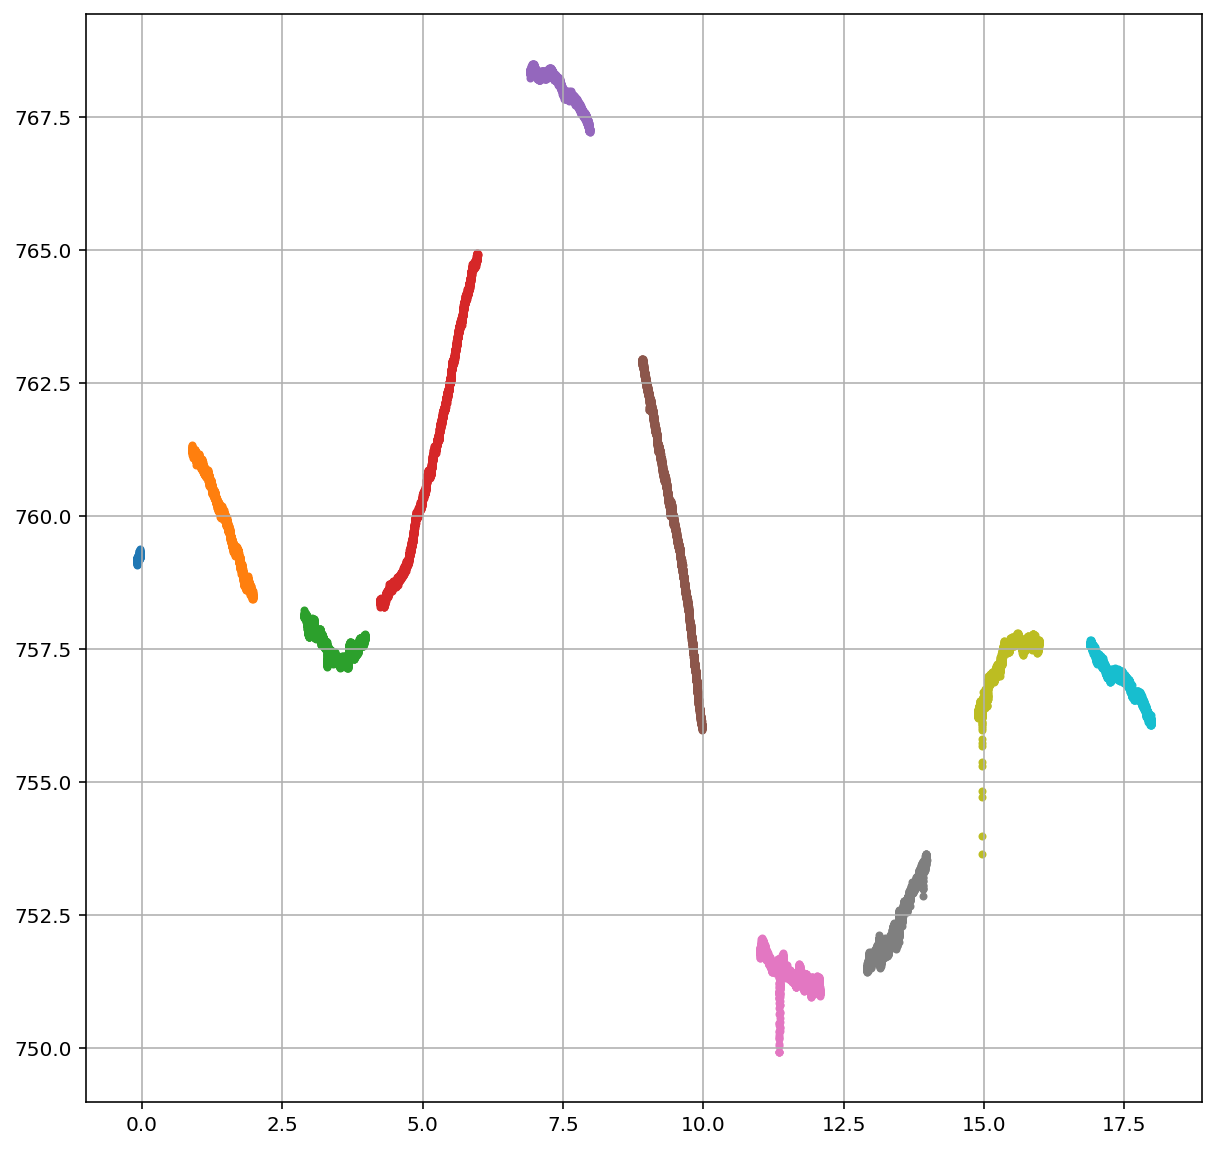

In [9]:
# Read in data file
filename = "./WE__0089___________DER_PS__________________P01.CSV"
time, pressure = read_Perseverance_MEDA_data(filename)
# plt.scatter(time, pressure)

times, pressures = break_at_gaps(time, pressure)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

for i in range(len(times)):
#     plt.axvline(time[0:-1][gaps][i])
    ax.scatter(times[i], pressures[i], marker='.')
ax.grid(True)

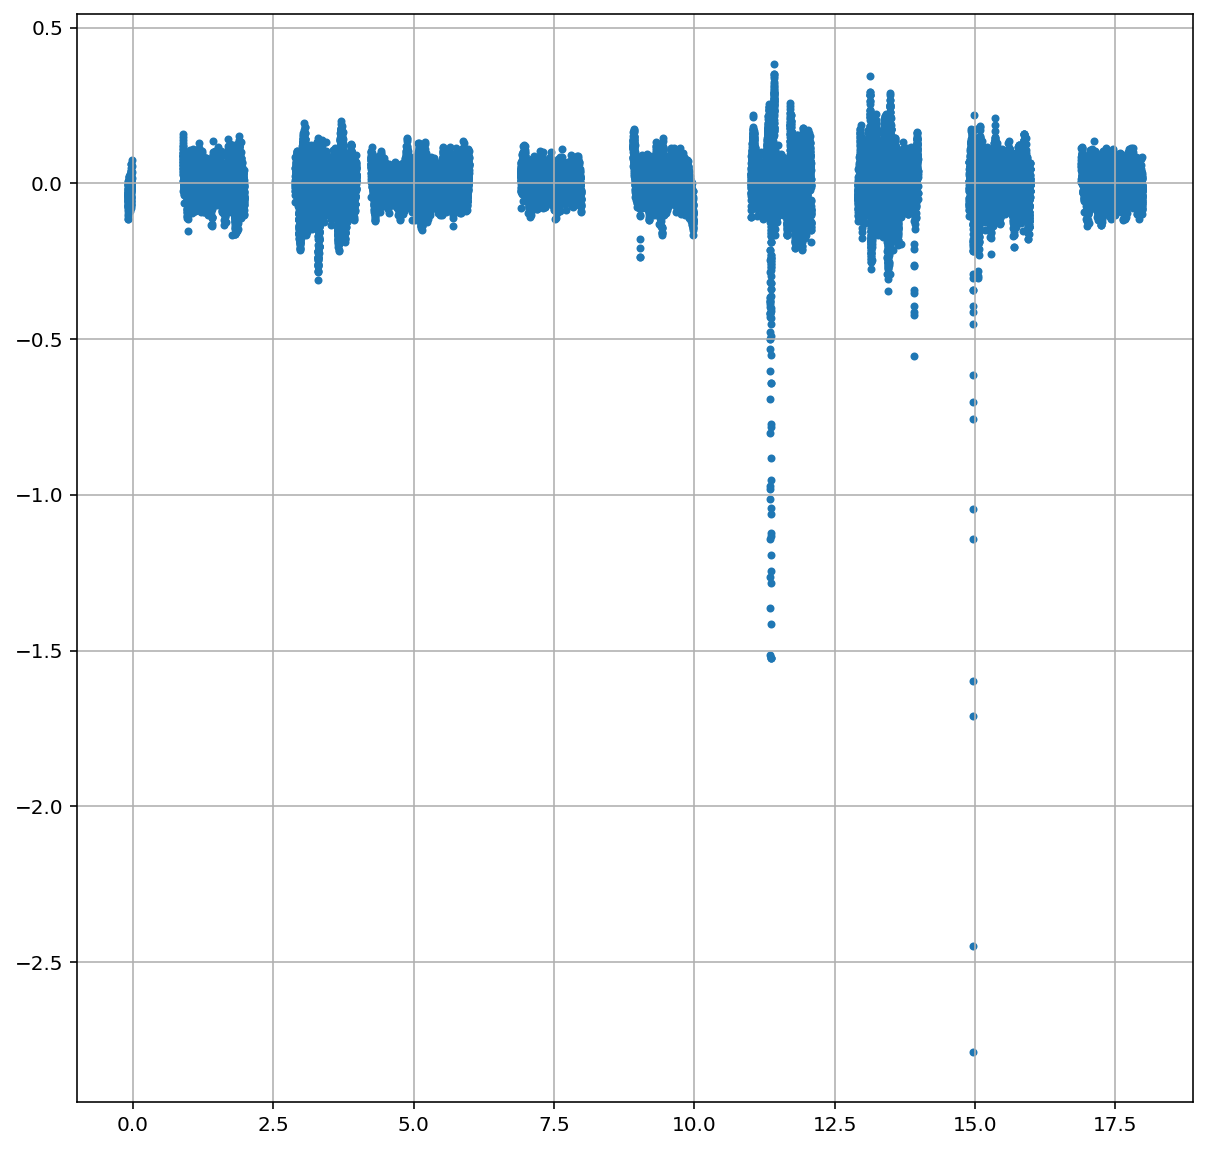

In [11]:
# Detrend

mt = MetTimeseries(time, pressure)

window_size = 500./3600 # window size is 500 seconds
mt.detrend_pressure_timeseries(window_size)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(mt.time, mt.detrended_pressure, marker='.')
ax.grid(True)

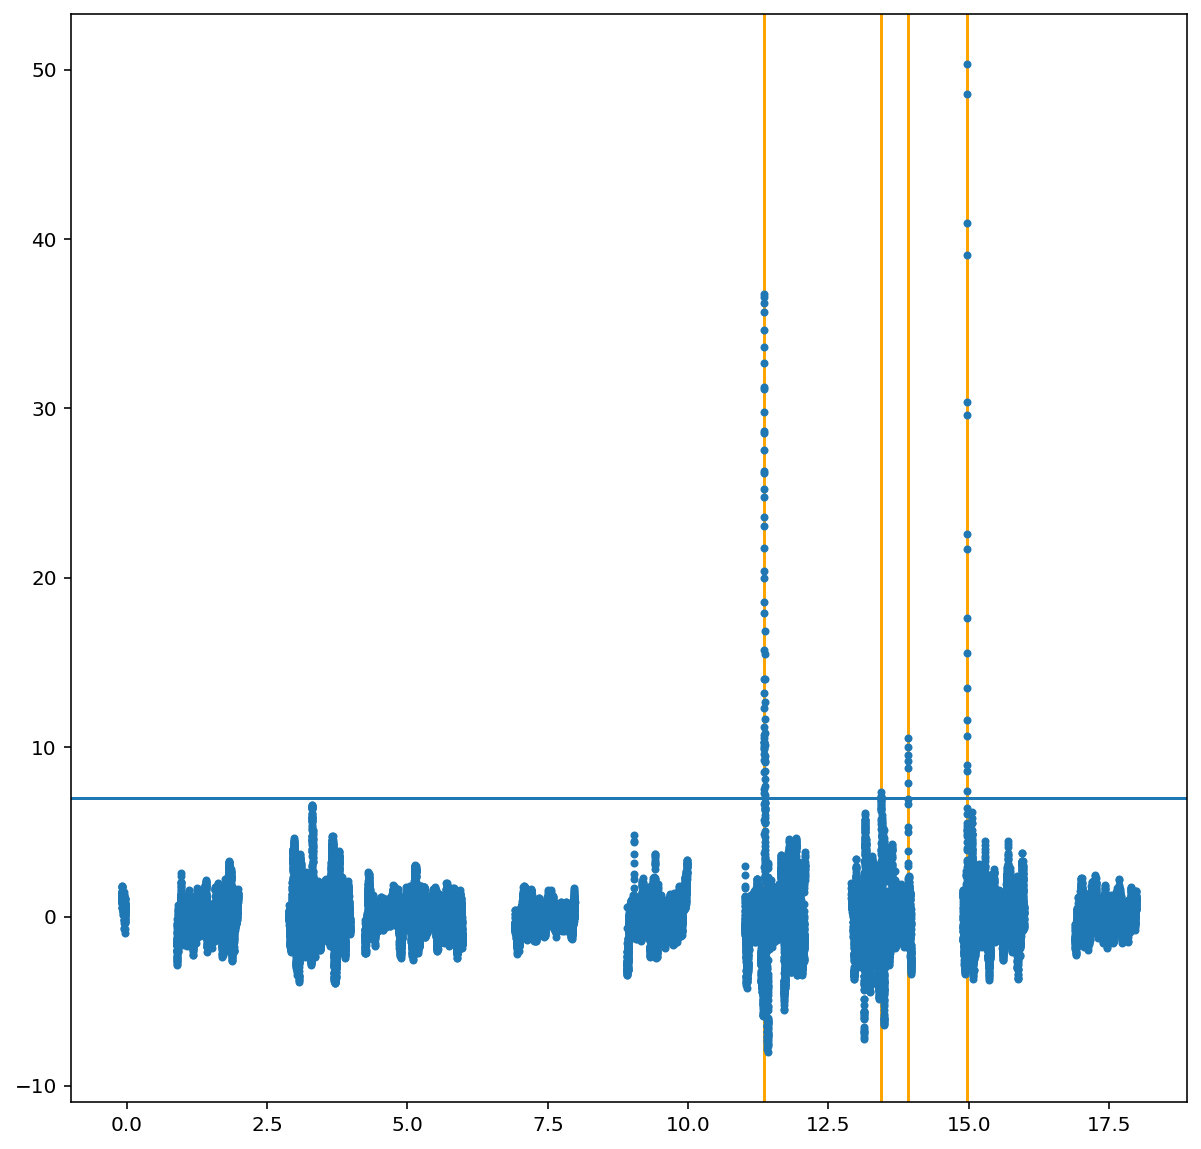

In [92]:
# Detect vortex signals
matched_filter_width = 2.*mt.sampling
matched_filter_depth = 1./np.pi
distance_between_peaks = 30
detection_threshold = 7.

conv = mt.apply_lorentzian_matched_filter(matched_filter_width, matched_filter_depth)
vortices = mt.find_vortices(detection_threshold=detection_threshold, distance=distance_between_peaks)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(mt.time, mt.convolution, ls='', marker='.')
ax.axhline(detection_threshold)

for i in range(len(mt.peak_indices)):
    ax.axvline(mt.time[mt.peak_indices[i]], color="orange", zorder=-1)

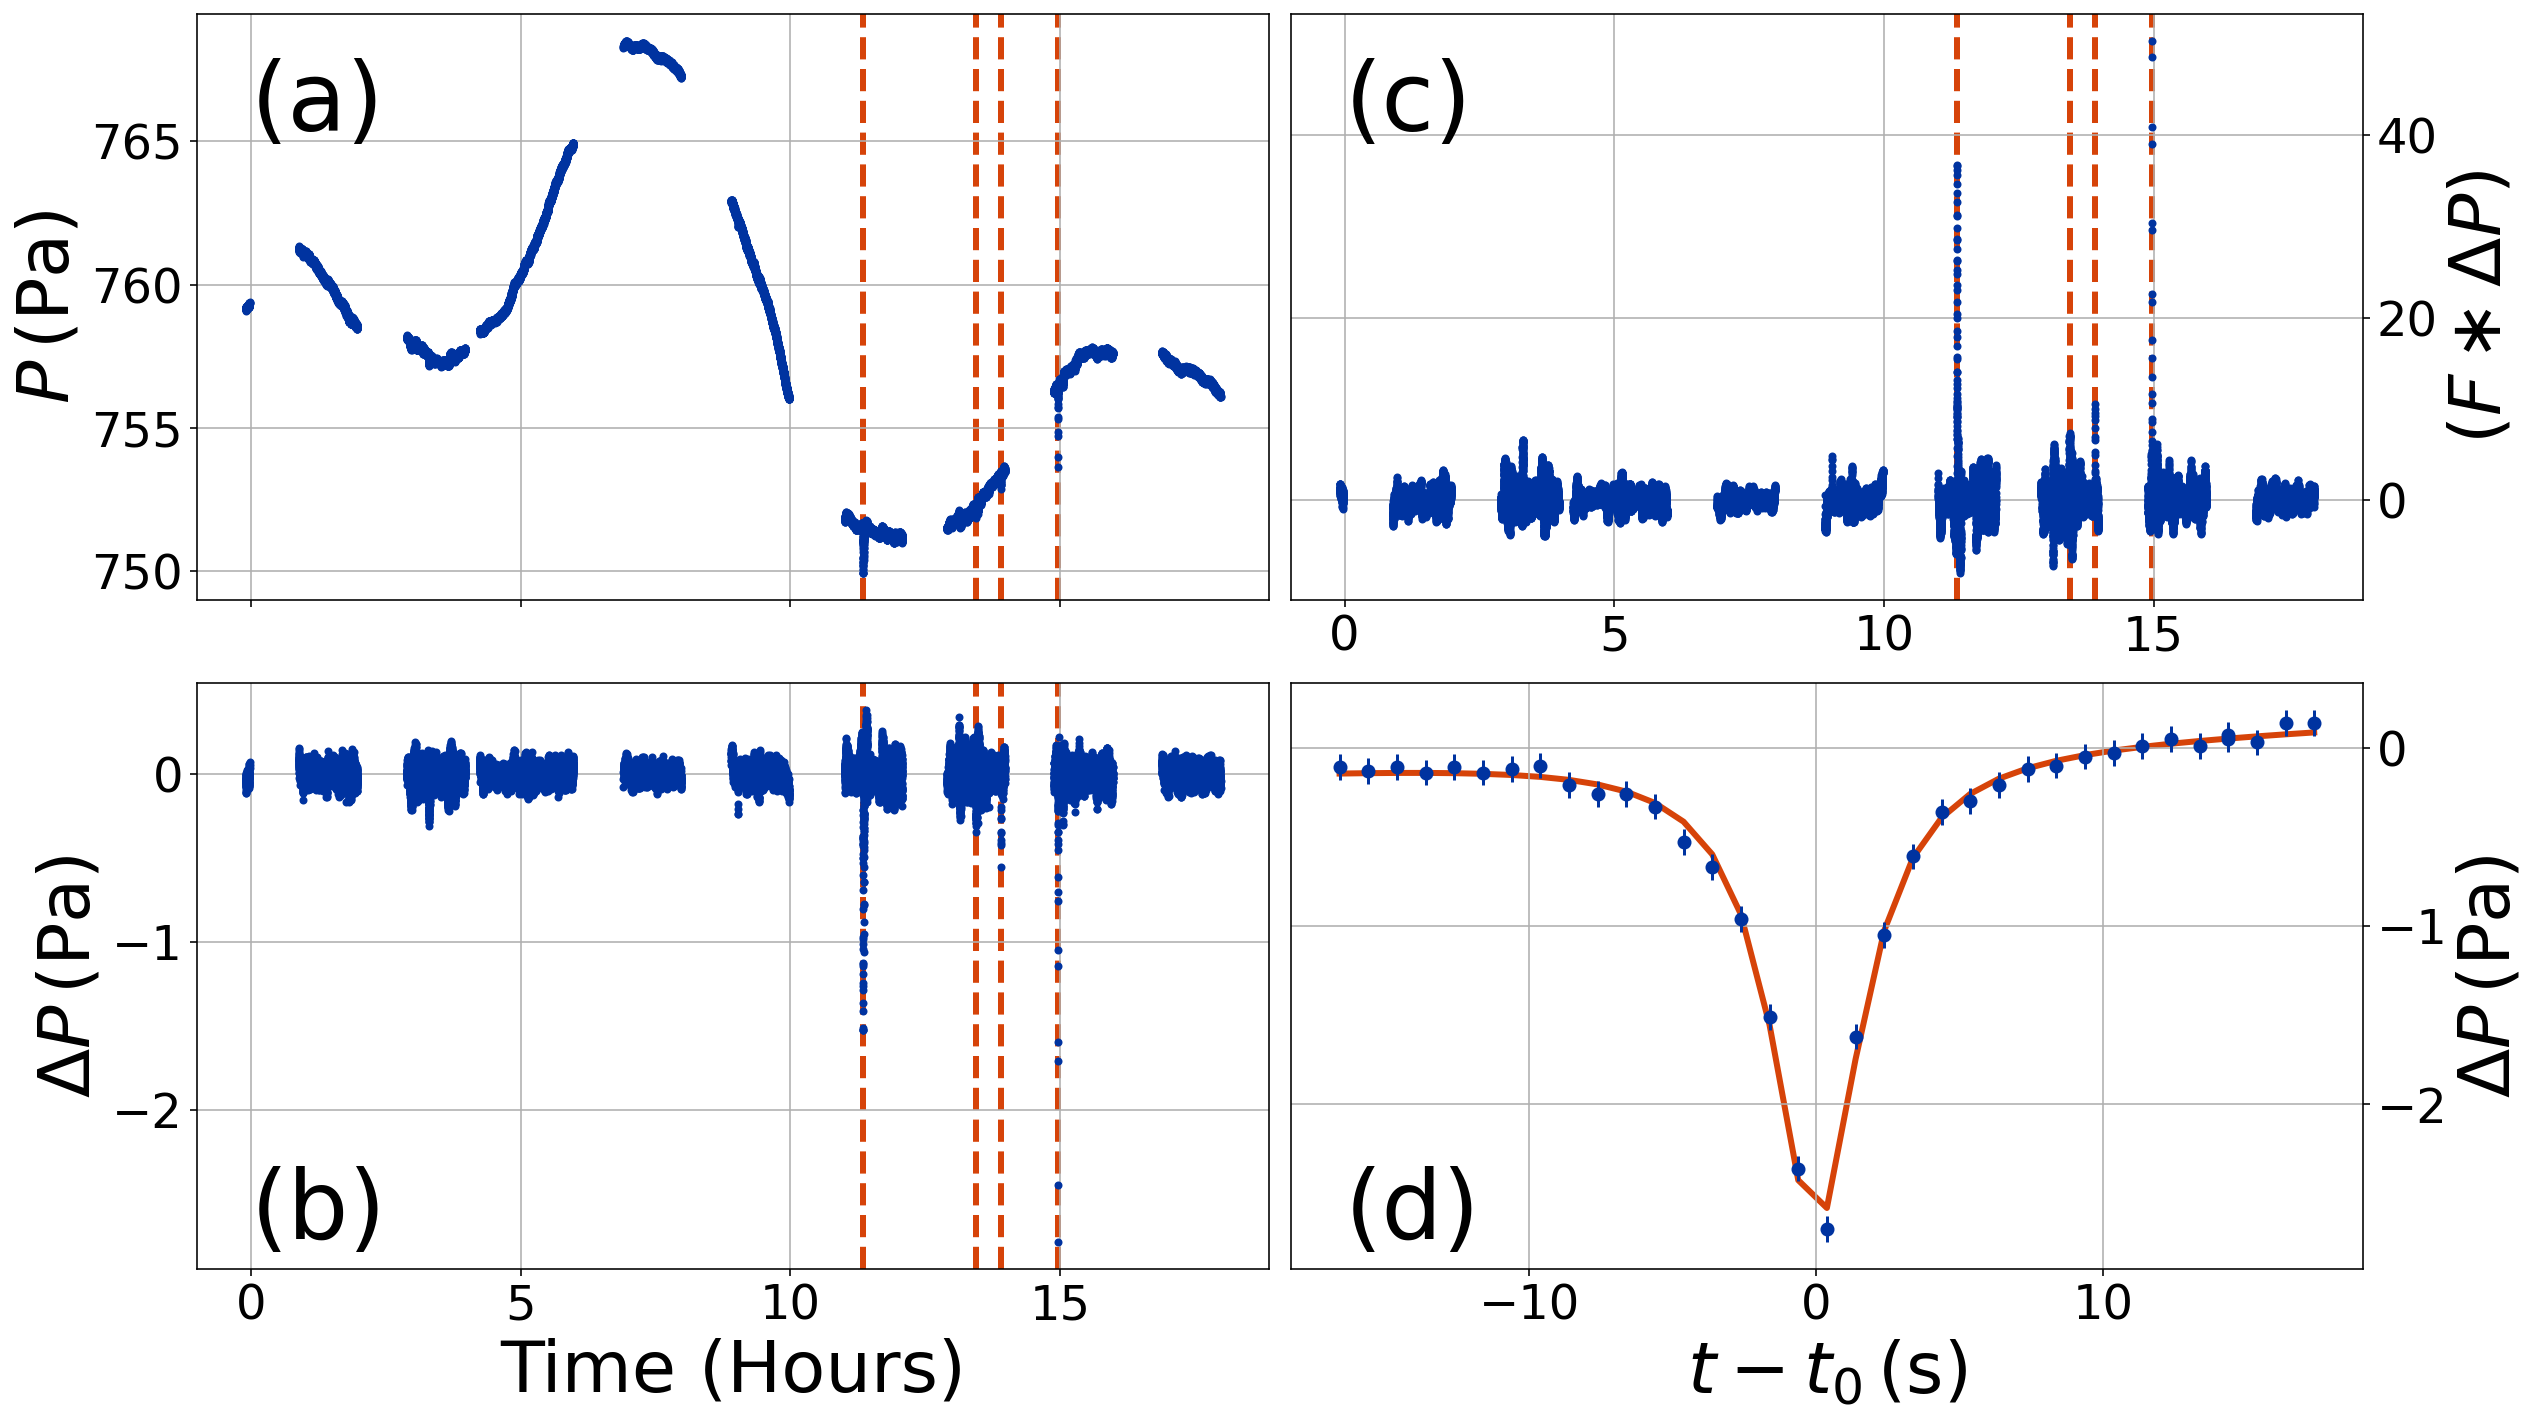

In [94]:
# Make final conditioned data figure
mt.make_conditioned_data_figure(which_vortex=0);
plt.tight_layout()